<a href="https://colab.research.google.com/github/Hashhhhhhhh/Linear-Regression-with-Quantum-Tomography-Dataset/blob/main/Quantum_State_tomography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Linear regression : Quantum Tomography Dataset

In [4]:
df=pd.read_csv('/content/quantum_tomography_dataset.csv')

In [5]:
df.head()

,fidelity,trace_distance,purity_original,purity_reconstructed
0,0.500000,0.750048,1.0,0.250193
1,0.713080,0.508523,1.0,0.517455
2,0.706639,0.504395,1.0,0.498761
3,0.706667,0.500628,1.0,0.498772
4,0.706754,0.500511,1.0,0.499028


In [6]:
df.shape

(500, 4)

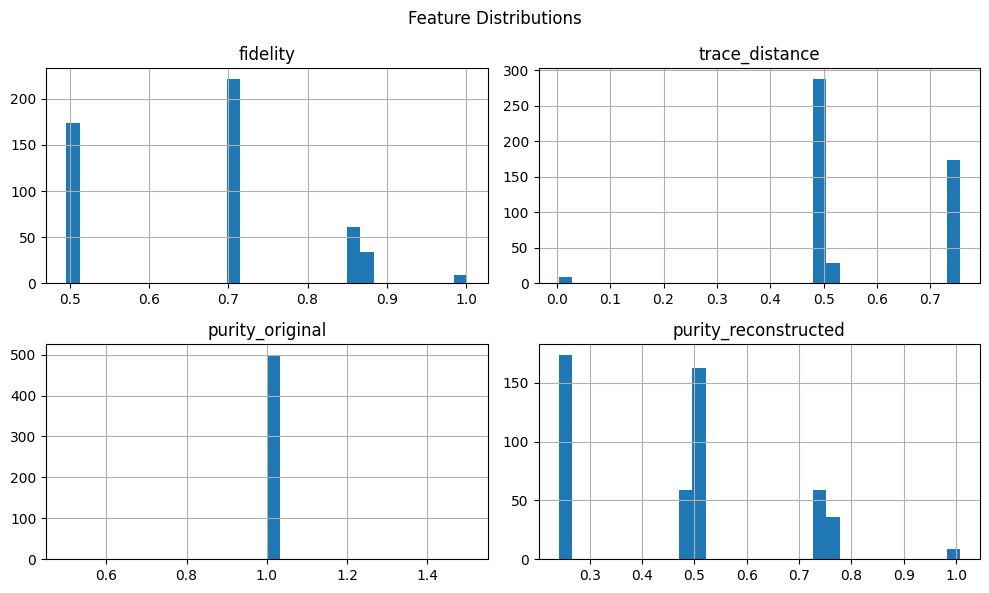

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(10, 6), bins=30)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

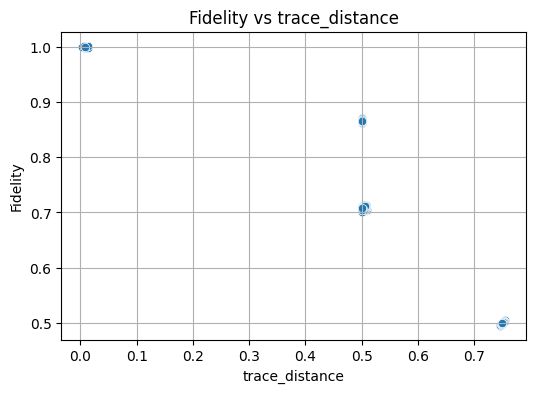

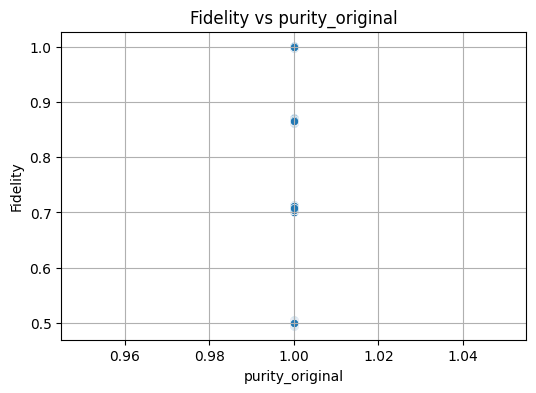

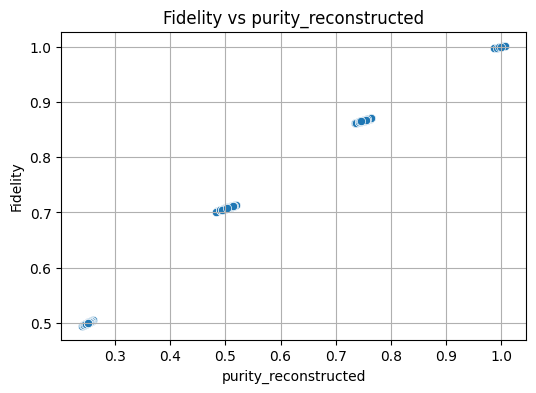

In [10]:
features = ['trace_distance', 'purity_original', 'purity_reconstructed']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['fidelity'])
    plt.title(f"Fidelity vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('Fidelity')
    plt.grid(True)
    plt.show()


In [12]:
print(df.corr()) #to check for linearity across all the features

                      fidelity  trace_distance  purity_original  \
fidelity              1.000000       -0.891029              NaN   
trace_distance       -0.891029        1.000000              NaN   
purity_original            NaN             NaN              NaN   
purity_reconstructed  0.994852       -0.874799              NaN   

                      purity_reconstructed  
fidelity                          0.994852  
trace_distance                   -0.874799  
purity_original                        NaN  
purity_reconstructed              1.000000  


In [14]:
df=df.drop(columns=['purity_original']) #as it is constant and has got no predictive role in ML

KeyError: "['purity_original'] not found in axis"

In [15]:
X = df[['purity_reconstructed', 'trace_distance']]
y = df['fidelity']

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9912619039160896
MSE: 0.00018727391776310624


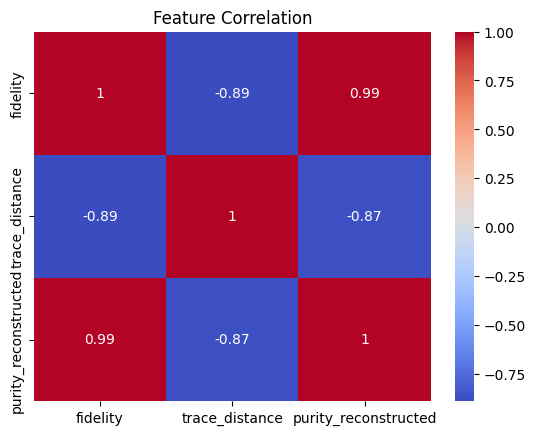

In [23]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [26]:
#to check if it is overfitting
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [27]:
print("=== Model Performance ===")
print(f"Training R² Score: {train_r2:.6f}")
print(f"Training MSE     : {train_mse:.6f}")
print(f"Test R² Score    : {test_r2:.6f}")
print(f"Test MSE         : {test_mse:.6f}")


=== Model Performance ===
Training R² Score: 0.991623
Training MSE     : 0.000163
Test R² Score    : 0.991262
Test MSE         : 0.000187
